In [1]:
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import analytic_functions

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

# Using coordinate objects with Spectrum

In [3]:
class OldSpectrum(object):
    def __init__(self, wl, spec, ra, dec):
        self.wl = wl
        self.spec = spec
        self.ra = ra
        self.dec = dec
        
class NewSpectrum(object):
    """
    This new version stores a single coordinate attribute instead of ra/dec
    attributes, which is useful on its own.  It also demonstrates using a 
    property to limit inputs: `coordinate` has to be a SkyCoord (or something
    like it anyway), and will automatically be transformed to ICRS coordinates.
    You may not actually want this last part in practice, but it demonstrates
    how properties can be used to control what' actually ends up stored in an
    object.
    """
    def __init__(self, wl, spec, coordinate):
        self.wl = wl
        self.spec = spec
        self.coordinate = coordinate
    
    @property
    def coordinate(self):
        return self._coordinate
    @coordinate.setter
    def coordinate(self, val):
        # automatically converts the coordinate to ICRS no matter what the input frame is
        if not hasattr(val, 'transform_to'):
            raise ValueError('input should be a SkyCoord')
        self._coordinate = val.transform_to('icrs')
        
spec = NewSpectrum(None, None, SkyCoord(l=1*u.deg, b=3*u.deg, frame='galactic'))
spec.coordinate

<SkyCoord (ICRS): (ra, dec) in deg
    (264.12581031, -26.50111864)>

# Using the spectral equivalencies to convert spectral axes 

For more background on this, see [the relevant docs page](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#spectral-units). Here we simply demonstrate the functionality that might be useful for the spectrum class without much explanation.

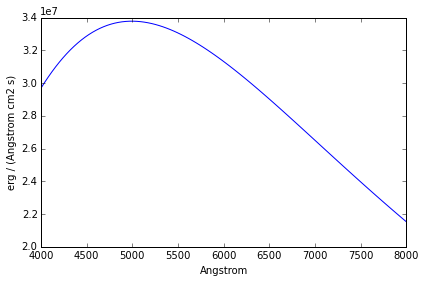

In [4]:
wl = np.linspace(4000, 8000, 100)*u.angstrom
# the 4pi sterradians just makes it into an isotropic flux density
spec_lamb = analytic_functions.blackbody_lambda(wl, 5800*u.K)*4*np.pi*u.sr
plt.plot(wl, spec_lamb)
plt.xlabel(wl.unit)
plt.ylabel(spec_lamb.unit)
plt.tight_layout()

In [5]:
#shouldn't work because naively a length can't transfor into a frequencynu = 
nu = wl.to(u.THz)
nu

UnitsError: 'Angstrom' (length) and 'THz' (frequency) are not convertible

In [6]:
# but in the context of a spectrum this *does* make sense
nu = wl.to(u.THz, u.spectral())
nu

<Quantity [ 749.481145  , 741.98633355, 734.63993421, 727.43758191,
            720.37508112, 713.44839764, 706.653651  , 699.98710712,
            693.44517154, 687.02438292, 680.72140693, 674.5330305 ,
            668.45615635, 662.48779781, 656.62507394, 650.86520487,
            645.20550743, 639.64339099, 634.17635346, 628.80197758,
            623.51792735, 618.32194463, 613.21184591, 608.1855193 ,
            603.24092159, 598.37607544, 593.58906684, 588.8780425 ,
            584.24120752, 579.67682309, 575.1832043 , 570.75871812,
            566.40178134, 562.11085875, 557.88446132, 553.72114444,
            549.61950633, 545.57818643, 541.59586391, 537.6712562 ,
            533.80311766, 529.99023825, 526.23144223, 522.52558701,
            518.87156192, 515.26828719, 511.71471279, 508.2098175 ,
            504.75260786, 501.34211726, 497.97740507, 494.6575557 ,
            491.38167785, 488.14890365, 484.95838794, 481.8093075 ,
            478.70086035, 475.6322651 , 472.6027

In [7]:
spec_nu = spec_lamb.to(u.erg/(u.Hz * u.s * u.cm**2), u.spectral_density(wl))

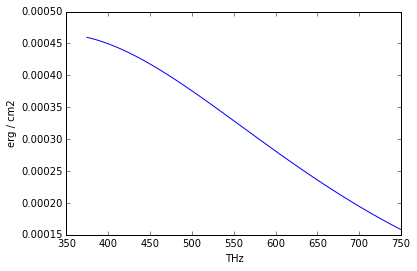

In [8]:
plt.plot(nu, spec_nu)
plt.xlabel(nu.unit)
plt.ylabel(spec_nu.unit)

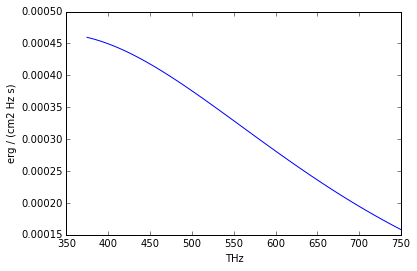

In [9]:
# sanity-check: make sure we get the same thing out from using the frequency version
# of the blackbody function directly
spec_nu = analytic_functions.blackbody_nu(nu, 5800*u.K)*4*np.pi*u.sr
plt.plot(nu, spec_nu)
plt.xlabel(nu.unit)
plt.ylabel(spec_nu.unit)